Release VERSION 230109

<h1>RSoXS plan simulator</h1>
this is a full stack of the SST scan system, from the loader through to the low level acquisition code, all simulated here
run all the hidden cells first!

In [1]:
%load_ext autoreload

from rsoxs_scans.spreadsheets import load_samplesxlsx, save_samplesxlsx
from rsoxs_scans.acquisition import dryrun_bar, get_acq_details
import pathlib

In [2]:
# userPath = pathlib.Path('/nsls2/users/alevin')
projectPath = pathlib.Path('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/beamline_stuff/BNL-NSLSII/SST1/')
sheetsPath = projectPath.joinpath('2024-1')
sheetsPath.exists()

True

In [4]:
# version = 'v5'
# sheetPath = sheetsPath.joinpath(f'levin_sample_bar_2024C1_{version}.xlsx')
sheetPath = sheetsPath.joinpath('in_2024-02-25_07-01-20_final2.xlsx')
sheetPath.exists()

True

In [5]:
# load the example bar
bar = load_samplesxlsx(sheetPath)

spreadsheet version is 2023-2 Version 1.0
Reading sheet Acquisitions


In [5]:
# save_samplesxlsx(bar, name=f'saved_bar_{version}', path=f'{str(sheetsPath)}/') # test writing to a temporary file

In [6]:
# bar2 = load_samplesxlsx("test2.xlsx") # test loading from a temporary file

In [6]:
# dry run it
outputs = dryrun_bar(bar,['apriority'],group='all')

___________________________________________________________________
Acquisition # 0 from Group: 
	Sample Name: PM6-Y6BO_p5CN-CB_rot
	Sample id: TRMSN25_rot
	Project: TRMSN_RSoXS_NEXAFS

Summary: load TRMSN25_rot with config WAXS, run rsoxs with priority(Sample: 0.0, Acquisition: 216)
	Starts @ 0:00:00 takes 0:15:30 (+120 seconds for configuration change)

> Step 0: load configuration WAXS
> Step 1: load sample PM6-Y6BO_p5CN-CB_rot
> Step 2: set Diode range to high
> Step 3: setting 3 polarizations from 0.0 to 90.0
 RSoXS scanning ['waxs_det'] from 250.0 eV to 350.0 eV on the rsoxs l/mm grating
    in 56 steps with exposure times from 1.0 to 1.0 seconds
___________________________________________________________________
___________________________________________________________________
Acquisition # 1 from Group: 
	Sample Name: BareSiN_01_rot
	Sample id: TRMSN1_rot
	Project: TRMSN_RSoXS_NEXAFS

Summary: load TRMSN1_rot with config WAXS, run rsoxs with priority(Sample: 0.0, Acquisition:

In [25]:
(10 * 3 * 24 * 2)/60

24.0

In [66]:
# Get more details on a given acquisition
get_acq_details(40,outputs)

--------------------------------------------------
>Step: 0
--------------------------------------------------
{
    "description": "load configuration WAXS\n",
    "action": "load_configuration",
    "kwargs": {
        "configuration": "WAXS"
    },
    "queue_step": 0,
    "acq_index": 40
}
--------------------------------------------------
>Step: 1
--------------------------------------------------
{
    "description": "load sample Y6_2000_directSiN\n",
    "action": "load_sample",
    "kwargs": {
        "sample": {
            "bar_name": "AndrewBar",
            "sample_id": "TRMSN9",
            "sample_name": "Y6_2000_directSiN",
            "project_name": "TRMSN_NEXAFS_and_RSoXS",
            "institution": "CUBLDER",
            "proposal_id": 311130,
            "bar_spot": "7A",
            "front": true,
            "grazing": false,
            "angle": 0,
            "height": 0.2,
            "sample_desc": "",
            "project_desc": "",
            "sample_prior

In [59]:
# get the set of all actions
actions = set()
for acq in outputs:
    for step in acq['steps']:
        actions.add(step['action'])
print(actions)

{'spiral_scan_core', 'message', 'diode_high', 'load_configuration', 'load_sample', 'nexafs_scan_core', 'rsoxs_scan_core'}


In [60]:
arguments = {}
for action in actions:
    keys = set()
    for acq in outputs:
        for step in acq['steps']:
            if step['action'] == action:
                if 'kwargs' in step:
                    for kwarg in step['kwargs']:
                        keys.add(kwarg)
    arguments[action]=keys
    print("{:<18} : {}".format(action,keys))

spiral_scan_core   : {'uid', 'enscan_type', 'md', 'priority', 'configuration', 'type', 'angle', 'sample_id', 'stepsize', 'exposure', 'dets', 'diameter', 'pol', 'energy', 'group', 'grating', 'Parameter/ Index'}
message            : set()
diode_high         : set()
load_configuration : {'configuration'}
load_sample        : {'sample'}
nexafs_scan_core   : {'uid', 'enscan_type', 'md', 'priority', 'configuration', 'type', 'angle', 'sample_id', 'scan_params', 'pol', 'group', 'cycles', 'grating', 'Parameter/ Index'}
rsoxs_scan_core    : {'uid', 'polarizations', 'temps_with_locations', 'md', 'configuration', 'priority', 'enscan_type', 'type', 'sample_id', 'times', 'temp_wait', 'locations', 'dets', 'energies', 'group', 'grating', 'Parameter/ Index'}


<h1>Examples of edges, ratios, frames

[1850.  1850.8 1851.6 1852.4 1853.2 1854.  1854.8 1855.6 1856.4 1857.2
 1858.  1858.8 1859.6 1860.4 1861.2 1862.  1862.8 1863.6 1864.4 1865.2
 1866.  1866.8 1867.6 1868.4 1869.2 1870.  1870.8 1871.6 1872.4 1873.2
 1874.  1874.8 1875.6 1876.4 1877.2 1878.  1878.8 1879.6 1880.4 1881.2
 1882.  1882.8 1883.6 1884.4 1885.2 1886.  1886.8 1887.6 1888.4 1889.2
 1890.  1890.8 1891.6 1892.4 1893.2 1894.  1894.8 1895.6 1896.4 1897.2
 1898.  1898.8 1899.6 1900.4 1901.2 1902.  1902.8 1903.6 1904.4 1905.2
 1906.  1906.8 1907.6 1908.4 1909.2 1910.  1910.8 1911.6 1912.4 1913.2
 1914.  1914.8 1915.6 1916.4 1917.2 1918.  1918.8 1919.6 1920.4 1921.2
 1922.  1922.8 1923.6 1924.4 1925.2 1926.  1926.8 1927.6 1928.4 1929.2
 1930. ]
101


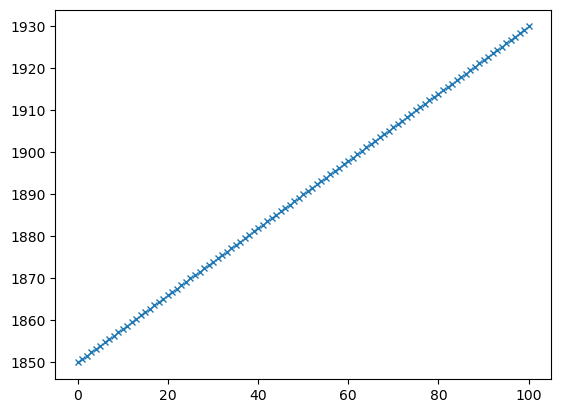

In [13]:
# totally manual simple scan
from rsoxs_scans.constructor import get_energies
energies = get_energies((1850,1930),100)

In [ ]:
# precise energy list
# you can fool the algorithm if you put 1 as the number of frames it will only take one frame at each of the thresholds, including the last one, so you can sort of treat this as just an energy list
# as a corollary, you can't have a total number of frames less than the thresholds that you give it in edges (it will at a minimum always take the threshold values)
energies = get_energies((250,250,250,340,340,341,280,281.45,500,500),1)

In [ ]:
# use a default
energies = get_energies('Nitrogen')

In [ ]:
# use a default with a different name
energies = get_energies('c')

In [ ]:
# use a different built in interval set
energies = get_energies('c','full','carbon nonaromatic')

In [ ]:
# get a very short version of this scan
energies = get_energies('c','very short','carbon nonaromatic')

In [ ]:
# I don't have time for this, I only want ~10 energies
energies = get_energies('c',10,'carbon nonaromatic')

[350.   338.75 327.5  316.25 305.   302.85 300.65 298.5  296.35 294.15
 292.   291.6  291.15 290.75 290.35 289.9  289.5  289.1  288.65 288.25
 287.85 287.4  287.   286.8  286.6  286.4  286.2  286.   285.8  285.6
 285.4  285.2  285.   284.8  284.6  284.4  284.2  284.   283.8  283.6
 283.4  283.2  283.   282.8  282.6  282.4  282.2  282.   280.   278.
 276.   274.   272.   270.   260.   250.  ]
56


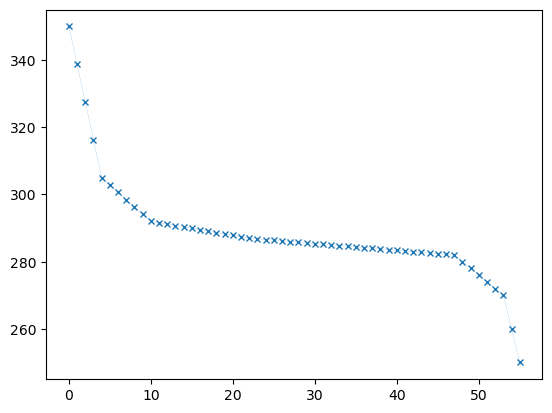

In [15]:
# also, I made single entry energies also work
energies = get_energies([350, 305, 292, 287, 282, 270, 250],'short',[5, 1, 0.2, 0.1, 1, 5])

In [ ]:
# also option to have frames as a list of exact numbers needed in each region
energies = get_energies('c',[2,5,10,40,5,2])

In [ ]:
# putting in zero effectively removes that region
energies = get_energies('c',[2,5,10,0,5,2])

In [ ]:
from rsoxs_scans.constructor import construct_exposure_times
times,_ = construct_exposure_times(get_energies([270,280,290,400],500,[2,1,10]),1)
len(times)

In [ ]:
from rsoxs_scans.constructor import get_nexafs_scan_params
get_nexafs_scan_params('n','normal')

<h1>Example of complex Exposure times

In [ ]:
construct_exposure_times(get_energies((1850,1930),100),[2,("between",1870,1900.0),4,("greater_than",1920.0),1],80)

In [ ]:
isinstance('asdf',str)